In [33]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from sklearn.model_selection import train_test_split
import torch.nn as nn

import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from sklearn.model_selection import train_test_split
import torch.nn as nn

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import SVHN
from torch.utils.data import DataLoader, ConcatDataset
from torchvision.models import alexnet


In [2]:
# set seed
seed_value = 42
torch.manual_seed(seed_value)
random.seed(seed_value)

In [3]:
# Define the transforms to be applied to each image
# during preprocessing
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [9]:
# import zipfile
# with zipfile.ZipFile('data/cnn_dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('.')


In [4]:
# Load the images from the three folders using ImageFolder
# and apply the transforms
#data = datasets.ImageFolder('data/cnn_dataset', transform=transform)
data = datasets.ImageFolder('/kaggle/input/cnn-dataset', transform=transform)


In [6]:
# Define path to the dataset folders
data_dir = '/kaggle/input/cnn-dataset'

# Define the folders of the dataset
folders = ['dogs', 'food', 'vehicles']

# Define empty lists to store the information
class_names = []
num_images = []

# Loop through each folder and count the number of images in each folder
for folder in folders:
    path = os.path.join(data_dir, folder)
    num = len(os.listdir(path))
    class_names.append(folder)
    num_images.append(num)

# Print the total number of images in the dataset and number of images in each folder
total_images = sum(num_images)
print("NUMERICAL STATISTICS OF THE DATASET:")
print(f"Total number of images: {total_images}")
for i in range(len(class_names)):
    print(f"{class_names[i]}: {num_images[i]} images")
    
# Calculate the mean and standard deviation of pixel values
pixel_values = []
for folder in folders:
    path = os.path.join(data_dir, folder)
    for filename in os.listdir(path):
        img = Image.open(os.path.join(path, filename))
        pixel_values.append(np.mean(np.array(img)))
pixel_values = np.array(pixel_values)
mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)

#print('Pixel Values: ',pixel_values)
print('Mean Pixel Value: ',mean_pixel_value)
print('Standard Pixel Value: ',std_pixel_value)

NUMERICAL STATISTICS OF THE DATASET:
Total number of images: 30000
dogs: 10000 images
food: 10000 images
vehicles: 10000 images
Mean Pixel Value:  113.80657468804253
Standard Pixel Value:  26.469181850734802


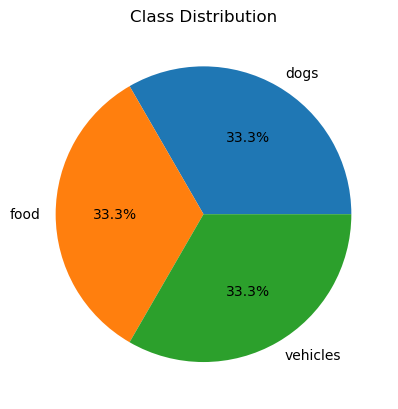

In [8]:
# Plot a pie chart to show the distribution of classes
plt.pie(num_images, labels=class_names, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

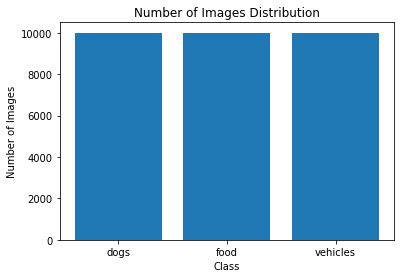

In [16]:
# Plot a bar chart to show the distribution of the number of images
plt.bar(class_names, num_images)
plt.title('Number of Images Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

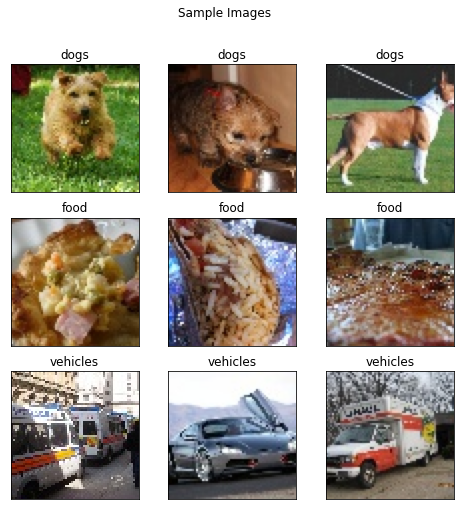

In [17]:
# Show a grid of sample images from each folder
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i in range(len(folders)):
    folder_path = os.path.join(data_dir, folders[i])
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)[:3]]
    for j in range(3):
        img = Image.open(image_paths[j])
        axes[i,j].imshow(img)
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].set_title(folders[i])
plt.suptitle('Sample Images')
plt.show()


In [13]:
train_load = int(0.80*len(data))
test_load = int(0.20*len(data))

In [14]:
train_data, test_data = torch.utils.data.random_split(data, [train_load, test_load])


In [15]:
# Create data loaders for the training and testing sets
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

# Create data loaders for the training and testing sets
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)
#test_loader = torch.utils.data.DataLoader(test_data, shuffle=False)




In [16]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.dropout = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(in_features=256*5*5, out_features=4096)
        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.fc3 = nn.Linear(in_features=4096, out_features=3)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = nn.ReLU()(x)
        x = self.conv4(x)
        x = nn.ReLU()(x)
        x = self.conv5(x)
        x = nn.ReLU()(x)
        x = self.pool3(x)
        x = torch.flatten(x, start_dim=1)
        x = self.dropout(x)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x


In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AlexNet().to(device)
print(model)
device

AlexNet(
  (conv1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=6400, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=3, bias=True)
)


device(type='cuda')

In [18]:
# Define the loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [19]:
# Train the model for 20 epochs
def train_loop(train_loader, model, loss_fn, optimizer, train_losses, train_acc):
    # Set model to training mode
    model.train()
    train_loss, train_correct, train_total = 0.0, 0, 0
    for i, (images, labels) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad() 
        
        images = images.cuda()
        labels = labels.cuda()

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate train loss and accuracy
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Print the train loss and accuracy every 100 batches
        if (i+1) % 100 == 0:
            print('Epoch [{}], Step [{}/{}], Train Loss: {:.4f}, Train Accuracy: {:.2f}%'.format(t+1, i+1, len(train_loader), train_loss/train_total, 100*train_correct/train_total))    
    train_losses.append(train_loss/train_total)
    train_acc.append(100*train_correct/train_total)


In [20]:
# Test loop
def test_loop(test_loader, model, loss_fn, test_losses, test_acc):
    # Set model to evaluation mode
    model.eval()
    test_loss, test_correct, test_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.cuda()
            labels = labels.cuda()
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Calculate test loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()


        # Print the test loss and accuracy
        print('Epoch [{}], Test Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(t+1, test_loss/test_total, 100*test_correct/test_total))
    test_losses.append(test_loss/test_total)
    test_acc.append(100*test_correct/test_total)

In [22]:
# epoch loop
epoch = 20
train_losses, test_losses = [], []
train_acc, test_acc = [], []
for t in range(epoch):
    train_loop(train_loader, model, loss_fn, optimizer, train_losses, train_acc)
    test_loop(test_loader, model, loss_fn, test_losses, test_acc)

print('Done!')

Epoch [1], Step [100/375], Train Loss: 1.0981, Train Accuracy: 34.00%
Epoch [1], Step [200/375], Train Loss: 1.0972, Train Accuracy: 35.49%
Epoch [1], Step [300/375], Train Loss: 1.0944, Train Accuracy: 36.61%
Epoch [1], Test Loss: 1.0153, Test Accuracy: 45.65%
Epoch [2], Step [100/375], Train Loss: 0.9301, Train Accuracy: 55.95%
Epoch [2], Step [200/375], Train Loss: 0.8831, Train Accuracy: 60.18%
Epoch [2], Step [300/375], Train Loss: 0.8588, Train Accuracy: 61.58%
Epoch [2], Test Loss: 0.7081, Test Accuracy: 67.60%
Epoch [3], Step [100/375], Train Loss: 0.7033, Train Accuracy: 68.72%
Epoch [3], Step [200/375], Train Loss: 0.6816, Train Accuracy: 69.94%
Epoch [3], Step [300/375], Train Loss: 0.6525, Train Accuracy: 71.69%
Epoch [3], Test Loss: 0.5445, Test Accuracy: 78.23%
Epoch [4], Step [100/375], Train Loss: 0.4787, Train Accuracy: 80.91%
Epoch [4], Step [200/375], Train Loss: 0.4577, Train Accuracy: 81.78%
Epoch [4], Step [300/375], Train Loss: 0.4484, Train Accuracy: 82.17%
Epoc

[1.0865313084920247, 0.8373598303794861, 0.6244472814400991, 0.43989133707682293, 0.3813988913695017, 0.3505560369094213, 0.31731483513116837, 0.3071686471104622, 0.2839359529018402, 0.26531048442920047, 0.26065900494654975, 0.24312878755728404, 0.2393598742087682, 0.23410451755921047, 0.22124540682633717, 0.2104109907746315, 0.19755603688955306, 0.19178272274136543, 0.19185304830471675, 0.180950672040383]


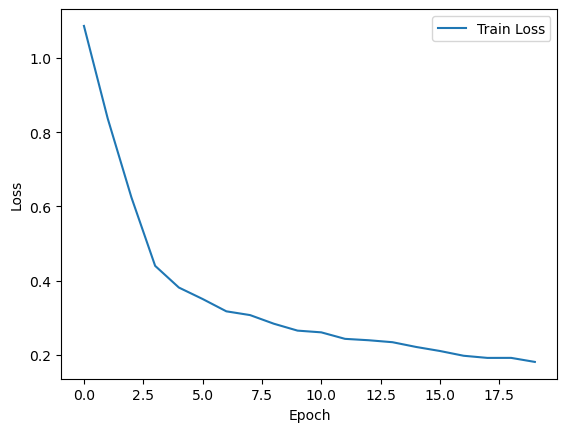

In [23]:
print(train_losses)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

[1.0152532475789389, 0.7080536929766337, 0.5444926813443501, 0.4297168614069621, 0.44822894620895387, 0.31328017139434816, 0.35652074837684633, 0.2906480775674184, 0.28164651624361675, 0.26786733643213906, 0.2540415335098902, 0.24803647661209108, 0.2763661445776622, 0.2316384965578715, 0.23057591513792675, 0.23237078491846722, 0.2128490517536799, 0.20533569486935935, 0.22771729711691538, 0.20956851486365]


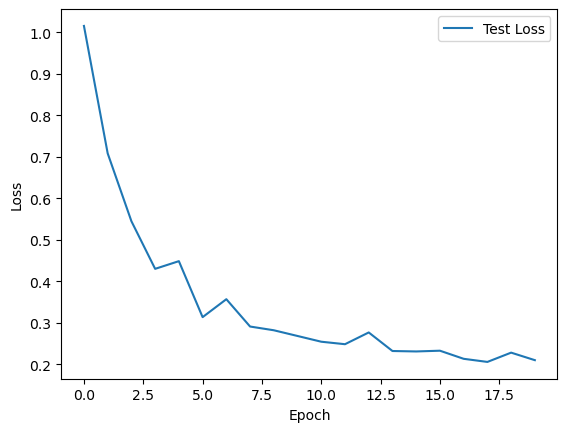

In [24]:
print(test_losses)
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

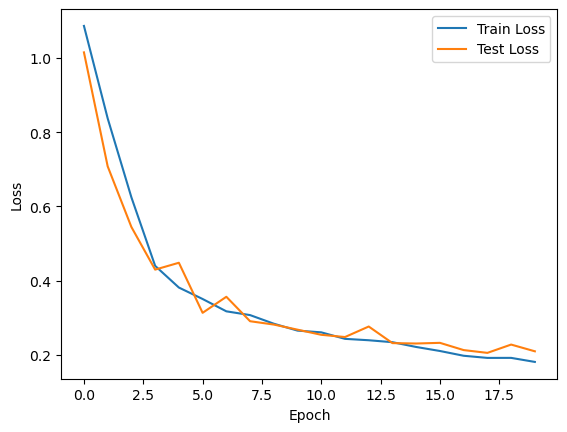

In [25]:
# plot Training and Testing loss on the same plot
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Increased number of filters in the convolutional layers.
# Use smaller kernel sizes in the convolutional layers.
# Use BatchNormalization after convolutional layers to improve model stability.
# Use AdaptiveMaxPooling instead of MaxPooling to avoid loss of spatial information.
# Add L2 regularization to the fully connected layers to prevent overfitting.
# Use Dropout only during training, and use a lower dropout rate.

class ModifiedAlexNet(nn.Module):
    def __init__(self):
        super(ModifiedAlexNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(256)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.AdaptiveMaxPool2d((6, 6))
        
        self.fc1 = nn.Linear(in_features=256*6*6, out_features=4096)
        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.fc3 = nn.Linear(in_features=4096, out_features=3)

        self.dropout = nn.Dropout(p=0.3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.conv5(x)
        x = self.relu(x)
        x = self.pool3(x)
        
        x = torch.flatten(x, start_dim=1)
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x


In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ModifiedAlexNet().to(device)
print(model)
device

ModifiedAlexNet(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): AdaptiveMaxPool2d(output_size=(6, 6))
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=3, bias=True)


device(type='cuda')

In [28]:
# Define the loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [30]:
# Initialize lists to store losses
modified_train_losses, modified_test_losses = [], []                        


# Train the model for 20 epochs
for epoch in range(10):
    # Set model to training mode
    model.train()
    modified_train_loss = 0.0
    train_correct = 0
    train_total = 0
    for i, (images, labels) in enumerate(train_loader):
        # Zero the gradients
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate train loss and accuracy
        modified_train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Print the train loss and accuracy every 100 batches
        if (i+1) % 100 == 0:
            print('Epoch [{}], Step [{}/{}], Train Loss: {:.4f}, Train Accuracy: {:.2f}%'.format(epoch+1, i+1, len(train_loader), modified_train_loss/train_total, 100*train_correct/train_total))

    modified_train_losses.append(train_loss)

   

OutOfMemoryError: CUDA out of memory. Tried to allocate 784.00 MiB (GPU 0; 15.90 GiB total capacity; 13.12 GiB already allocated; 439.75 MiB free; 14.59 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
# Set model to evaluation mode and calculate the test accuracy based on the last epoch of the train loop
model.eval()
modified_test_loss = 0.0
test_correct = 0
test_total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Calculate test loss and accuracy
        modified_test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

    # Print the test loss and accuracy
    print('Epoch [{}], Test Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(epoch+1, modified_test_loss/test_total, 100*test_correct/test_total))
    modified_test_losses.append(test_loss)


In [ ]:
print(modified_train_losses)
plt.plot(modified_train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(modified_test_losses)
plt.plot(modified_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# plot Training and Testing loss on the same plot
plt.plot(modified_train_losses, label='Train Loss')
plt.plot(modified_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# plot Training and Testing loss on the same plot
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.plot(modified_train_losses, label='Train Loss')
plt.plot(modified_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Part 4

In [31]:
# Define the data augmentation techniques
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.2), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
])

In [34]:
# Load the SVHN dataset
# train_dataset = SVHN(root='.', split='train', download=True, transform=transform)
# test_dataset = SVHN(root='.', split='test', download=True, transform=transforms.ToTensor())

train_dataset = torchvision.datasets.SVHN(root='./data', split='train', transform=transform, download=True)
test_dataset = torchvision.datasets.SVHN(root='./data', split='test', transform=transforms.ToTensor(), download=True)


  0%|          | 0/182040794 [00:00<?, ?it/s]

  0%|          | 0/64275384 [00:00<?, ?it/s]

In [35]:
# Extract the images and labels from the dataset
X_train = train_dataset.data.transpose((0, 3, 1, 2))
y_train = train_dataset.labels
X_test = test_dataset.data.transpose((0, 3, 1, 2))
y_test = test_dataset.labels

# Compute the main statistics of the dataset
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("Number of classes:", len(np.unique(y_train)))
print("Image resolution:", X_train[0].shape)
print("Mean pixel value:", np.mean(X_train))
print("Standard deviation of pixel values:", np.std(X_train))


Training set size: 73257
Test set size: 26032
Number of classes: 10
Image resolution: (32, 3, 32)
Mean pixel value: 115.11177966923525
Standard deviation of pixel values: 50.81926790623289


Using downloaded and verified file: ./data/train_32x32.mat


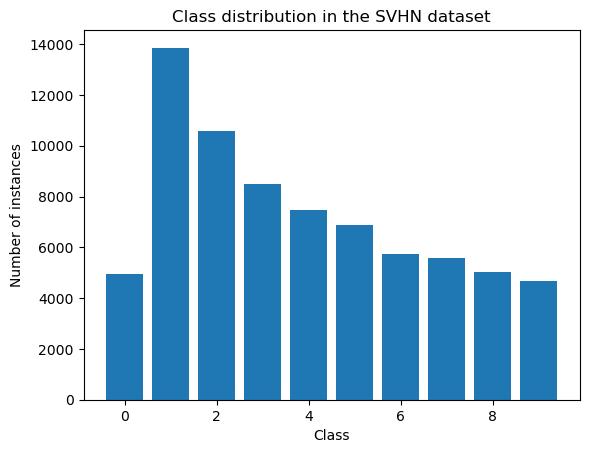

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Load the SVHN dataset
train_dataset = torchvision.datasets.SVHN(root='./data', split='train', transform=transform, download=True)

# Count the number of instances in each class
class_counts = np.zeros(10)
for i in range(len(train_dataset)):
    class_counts[train_dataset[i][1]] += 1

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(np.arange(10), class_counts)
ax.set_xlabel('Class')
ax.set_ylabel('Number of instances')
ax.set_title('Class distribution in the SVHN dataset')
plt.show()


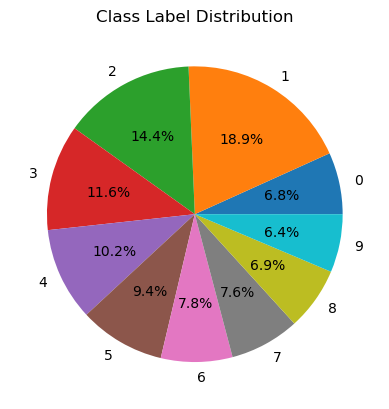

In [38]:
# Extract the labels from the dataset
y_train = train_dataset.labels

# Compute the frequency of each label in the dataset
label_counts = np.bincount(y_train)

# Create a pie chart of the label distribution
plt.pie(label_counts, labels=np.arange(10), autopct='%1.1f%%')
plt.title("Class Label Distribution")
plt.show()

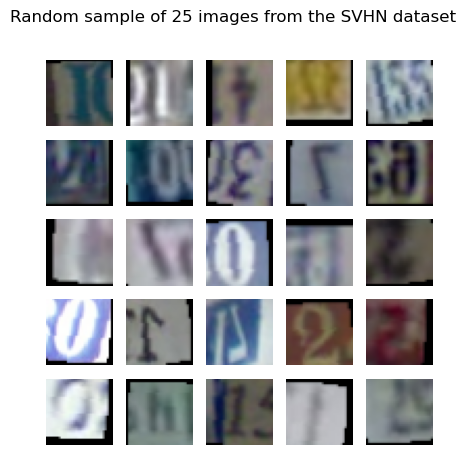

In [39]:
import random

# Choose a random sample of images
sample_indices = random.sample(range(len(train_dataset)), 25)
sample_images = [train_dataset[i][0] for i in sample_indices]

# Plot the sample images
fig, axs = plt.subplots(5, 5, figsize=(5, 5))
axs = axs.ravel()
for i in range(len(sample_images)):
    axs[i].imshow(sample_images[i].permute(1, 2, 0))
    axs[i].axis('off')
plt.suptitle('Random sample of 25 images from the SVHN dataset')
plt.show()

In [40]:
# Concatenate the original and augmented datasets
full_dataset = ConcatDataset([train_dataset, train_dataset])


In [41]:
# Define the data loaders
train_loader = DataLoader(full_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [42]:
import torch.nn as nn

class AlexNetSVHN(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNetSVHN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x


In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('metal')
model = AlexNetSVHN().to(device)
print(model)
device

AlexNetSVHN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)

device(type='cuda')

In [44]:
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [ ]:
# Train the model for 20 epochs
for epoch in range(20):
    for i, (images, labels) in enumerate(train_loader):
      
        images = images.cuda()
        labels = labels.cuda()

        # Zero the gradients        
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print the loss every 100 batches
        if (i+1) % 100 == 0:
            print('Epoch [{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, i+1, len(train_loader), loss.item()))


Epoch [1], Step [100/2290], Loss: 2.2273
Epoch [1], Step [200/2290], Loss: 2.2408
Epoch [1], Step [300/2290], Loss: 2.2854
Epoch [1], Step [400/2290], Loss: 2.2849
Epoch [1], Step [500/2290], Loss: 2.2040
Epoch [1], Step [600/2290], Loss: 2.2462
Epoch [1], Step [700/2290], Loss: 2.2481
Epoch [1], Step [800/2290], Loss: 2.1981
Epoch [1], Step [900/2290], Loss: 2.2588
Epoch [1], Step [1000/2290], Loss: 2.2770
Epoch [1], Step [1100/2290], Loss: 2.2003
Epoch [1], Step [1200/2290], Loss: 2.2916
Epoch [1], Step [1300/2290], Loss: 2.2610
Epoch [1], Step [1400/2290], Loss: 2.1820
Epoch [1], Step [1500/2290], Loss: 2.1624
Epoch [1], Step [1600/2290], Loss: 2.2609
Epoch [1], Step [1700/2290], Loss: 2.2254
Epoch [1], Step [1800/2290], Loss: 2.2960
Epoch [1], Step [1900/2290], Loss: 2.2844
Epoch [1], Step [2000/2290], Loss: 2.2466
Epoch [1], Step [2100/2290], Loss: 2.2169
Epoch [1], Step [2200/2290], Loss: 2.1628
Epoch [2], Step [100/2290], Loss: 2.2824
Epoch [2], Step [200/2290], Loss: 2.1783
Epo

In [ ]:
# Test the model
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_accuracy = 100 * correct / total
print(f"Test accuracy: {test_accuracy:.2f}%")
